In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D , Flatten , ZeroPadding2D , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [13]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

fatal: destination path 'Malaria-Classification-Using-CNN' already exists and is not an empty directory.


## **Data Prepration**

In [14]:
image_width =64
image_height = 64

In [15]:
datagen =ImageDataGenerator(rescale = 1/255.0 ,validation_split= 0.2)

In [16]:
train_data_generater = datagen.flow_from_directory(directory = '/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size =(image_width,image_height),
                                                   class_mode ='binary',
                                                   batch_size = 16,
                                                   subset = 'training')

Found 22048 images belonging to 2 classes.


In [17]:
validation_data_generater = datagen.flow_from_directory(directory = '/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size =(image_width,image_height),
                                                   class_mode ='binary',
                                                   batch_size = 16,
                                                   subset = 'validation')

Found 5510 images belonging to 2 classes.


In [18]:
train_data_generater.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

# **Cnn model**

## **Model Creation and Training**


In [38]:
model =Sequential()

model.add(Conv2D(16,(3,3), input_shape =(image_width , image_height , 3),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation ='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation ='relu'))
model.add(Dense(64,activation ='relu'))
model.add(Dense(64,activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 31, 31, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 32)       

In [40]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = 'accuracy')

In [41]:
history =model.fit_generator(generator = train_data_generater,
                             steps_per_epoch = len(train_data_generater),
                             epochs = 5,
                             validation_data =validation_data_generater,
                             validation_steps= len(validation_data_generater)
                             )

Epoch 1/5


<ipython-input-41-b75b95b1dc48>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history =model.fit_generator(generator = train_data_generater,


1378/1378 [==============================] - 121s 87ms/step - loss: 0.3872 - accuracy: 0.8237 - val_loss: 0.2056 - val_accuracy: 0.9336
Epoch 2/5
1378/1378 [==============================] - 111s 81ms/step - loss: 0.2015 - accuracy: 0.9430 - val_loss: 0.1772 - val_accuracy: 0.9448
Epoch 3/5
1378/1378 [==============================] - 110s 79ms/step - loss: 0.1733 - accuracy: 0.9492 - val_loss: 0.1852 - val_accuracy: 0.9443
Epoch 4/5
1378/1378 [==============================] - 112s 81ms/step - loss: 0.1568 - accuracy: 0.9532 - val_loss: 0.2102 - val_accuracy: 0.9372
Epoch 5/5
1378/1378 [==============================] - 111s 80ms/step - loss: 0.1499 - accuracy: 0.9544 - val_loss: 0.1823 - val_accuracy: 0.9410


In [42]:
history.history

{'loss': [0.38723301887512207,
  0.2014685869216919,
  0.17330288887023926,
  0.15680713951587677,
  0.14986369013786316],
 'accuracy': [0.8237481713294983,
  0.9429880380630493,
  0.949201762676239,
  0.9531930088996887,
  0.9543722867965698],
 'val_loss': [0.20563095808029175,
  0.17720818519592285,
  0.18524377048015594,
  0.2101978063583374,
  0.18227730691432953],
 'val_accuracy': [0.9335753321647644,
  0.9448275566101074,
  0.944283127784729,
  0.9372050762176514,
  0.9410163164138794]}

## **Data visiualization**

In [43]:
def learning_curve(history,epoch):
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train' , 'Val'],loc ='upper left')
  plt.show()


  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Train' , 'Val'],loc ='upper left')
  plt.show()

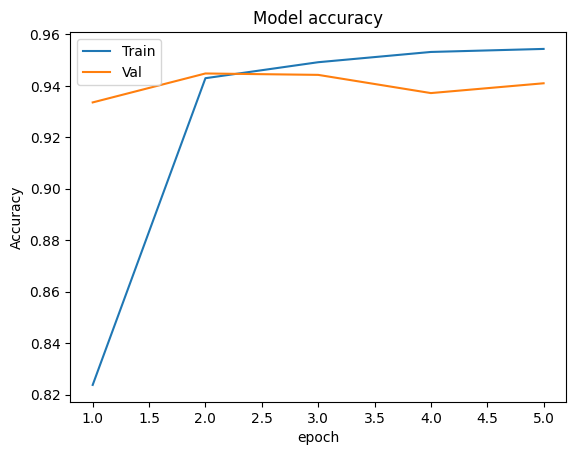

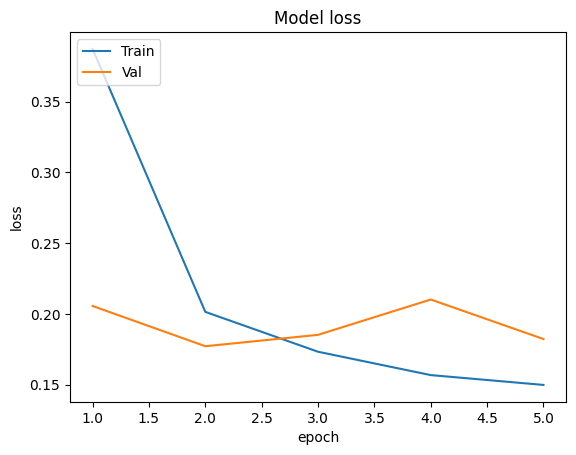

In [47]:
learning_curve(history,5)